In [1]:
import tensorflow as tf
import numpy as np
import warnings
import keras
warnings.filterwarnings(action='ignore')

Using TensorFlow backend.


In [2]:
# 두개의 숫자값으로 + 연산을 tensorflow 기반으로 진행
a = tf.constant(2)
b = tf.constant(3)
c = a + b

sess = tf.Session()

result = sess.run(c)

print(result)

AttributeError: module 'tensorflow' has no attribute 'Session'

In [3]:
x = np.array([0,1,2,3,4])
y = x*2 + 1  #[1,3,5,7,9]

# Keras 모델
model = keras.models.Sequential()

# 입력 노드 하나에 가중치 하나 선언
model.add(keras.layers.Dense(1, input_shape = (1, )))

# SGD - 확률적 경사 하강법, MSE - 평균제곱 오차 비용함수
model.compile('SGD', 'mse')

# 지도학습 
#model.fit(x[:2], y[:2], epochs = 300)
model.fit(x[:2], y[:2], epochs = 1000, verbose=0)

print('타겟 : ', y[2:])
print('예측 : ', model.predict(x[2:]).flatten())

타겟 :  [5 7 9]
예측 :  [4.949993 6.913808 8.877623]


###### Boston 집값 데이터 활용

In [6]:
from keras import layers, models, datasets
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

102/102 [==============================] - 0s 20us/step

 test loss -> 33.97


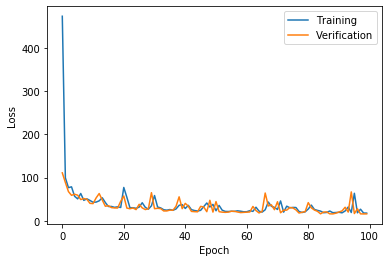

In [7]:
# 모델링 함수 구현
def ann_seq_func(Nin, Nh, Nout):
    # 모델 생성
    model = models.Sequential()
    
    # 입력 계층 노드의 수(Nin), 은닉 계층 노드의 수(Nh), 활성함수 (Relu : 0이하는 무시하고)
    model.add(keras.layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    
    # 은닉층 추가
    model.add(keras.layers.Dense(Nout, activation='relu', input_shape=(Nin,)))
    
    # SGD - 확률적 경사 하강법, MSE - 평균제곱 오차 비용함수
    model.compile(loss="mse", optimizer='sgd')
    
    return model

def data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    
    # 데이터 정규화
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    return (X_train, y_train), (X_test, y_test)
    
# main() - 회귀 ANN(Artificial Neural Network : 인공 신경망)
'''

'''
def main():
    Nin = 13
    Nh = 5
    Nout = 1
    
    model = ann_seq_func(Nin, Nh, Nout)
    
    (X_train, y_train), (X_test, y_test) = data_func()
    
    history = model.fit(X_train, y_train, epochs = 100, batch_size=100, validation_split=0.2, verbose=0)
    
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\n test loss -> {:.2f}'.format(performance_test))
    
    
    history = history.history
    
    '''cost/loss 변화 추이를 그래프로 보기'''
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc='best')
    
main()